In [10]:
import ROOT as r
import sys
import os
%jsroot on

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r.gSystem.Load("../lib/libdataProducts.so")
r.gSystem.Load("../lib/libunpackers.so")

0

In [4]:
from nearline_helpers import *

In [8]:
t = r.TChain("tree")
# runs = [302]
runs = [305]
# runs = [304]
# t.Add("../bin/*run00270_*.root")
# t.Add("../bin/*run00296_*.root")
# t.Add("../bin/*run00299_*.root")
# t.Add("../bin/*run00301_*.root")
# t.Add("../bin/*run00302_*.root")
# t.Add("../bin/nearline_hists_run00277_00041.root")
# t.Add("../bin/*run00252_*.root")
for run in runs:
    t.Add(f"../bin/*run00{run}_*.root")

t.GetEntries()

446206

In [11]:
c = r.TCanvas()
# t.Draw("integrals.integral","@integrals.size() == 1 && integrals.channelTag == 0","colz")
t.Draw("integrals.integral","integrals.channelTag == 0","colz")
c.SetLogy()
c.Draw()

In [12]:
c = r.TCanvas()
# t.Draw("integrals.integral","@integrals.size() == 1 && integrals.channelTag == 0","colz")
t.Draw("integrals.amplitude","integrals.channelTag == 0","colz")
c.SetLogy()
c.Draw()

: 

In [164]:
# n = t.Draw("Entry$", "integrals.pedestalStdev > 10","")
# entries = [t.GetV1()[i] for i in range(n)]
# print(entries)
# for i in entries:
#     t.GetEntry(int(i))
#     for wfi in t.integrals:
#         if(wfi.pedestalStdev > 10):
#             plot_integral(wfi)

#     break

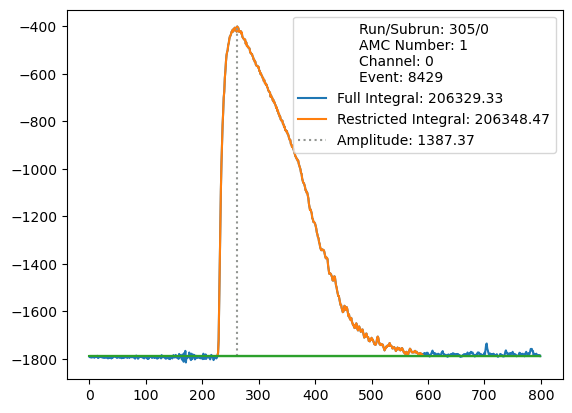

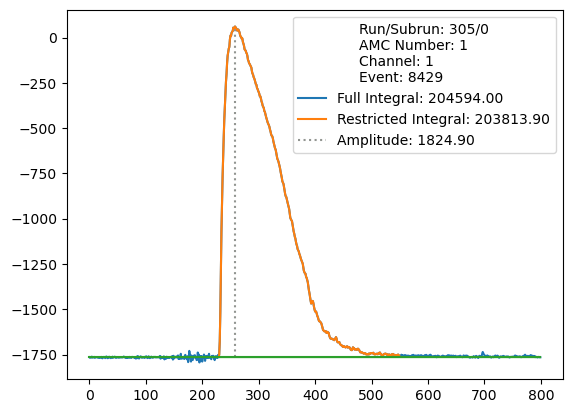

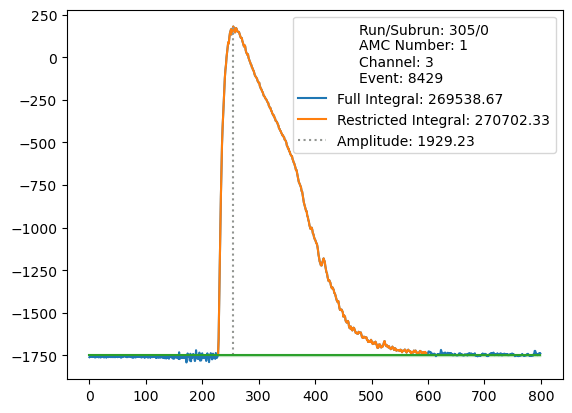

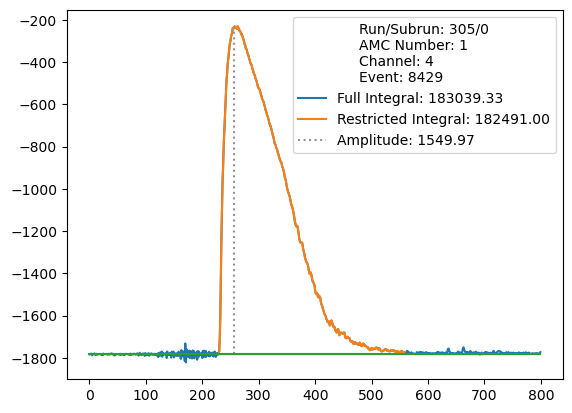

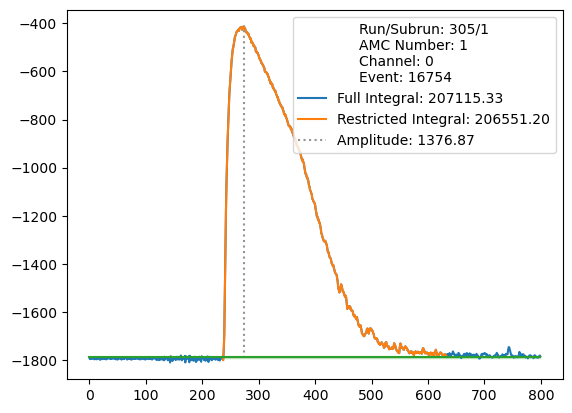

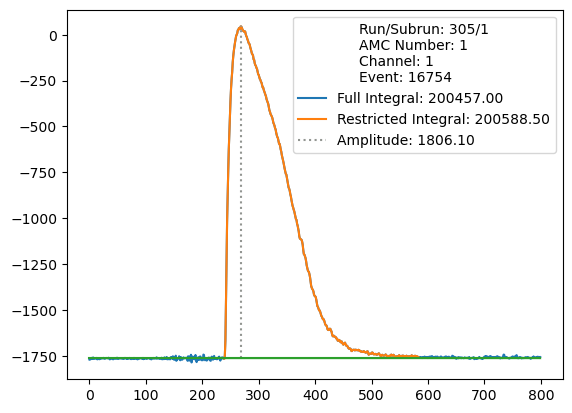

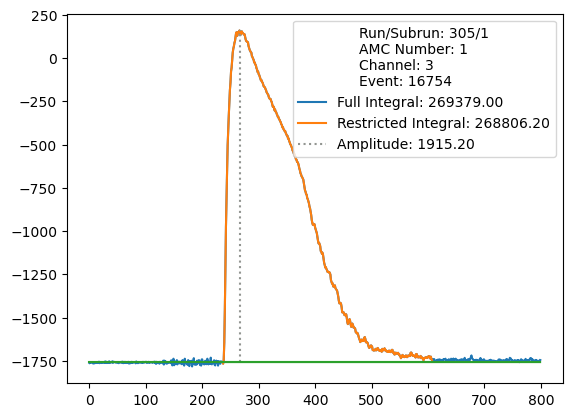

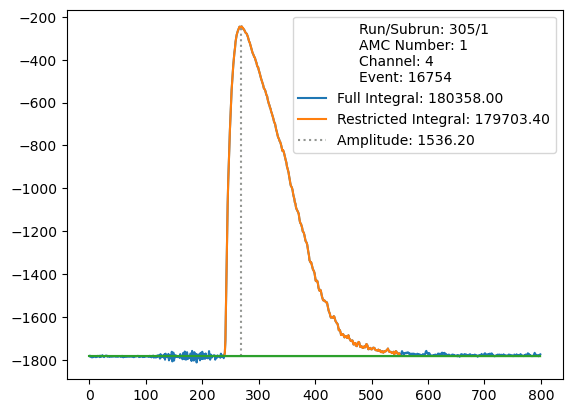

In [196]:
counter = 0
limit = 5
for e in t:
    for wfi in t.integrals:
        if(wfi.integral > 175_000):
            plot_integral(wfi)
            counter += 1
            plt.show()
    if(counter > limit):
        break

In [166]:
# counter = 0
# limit = 5
# for e in t:
#     for wfi in t.integrals:
#         if(t.integrals.size() == 1 and wfi.integral < 5_000):
#             plot_integral(wfi)
#             counter += 1
#             plt.show()
#     if(counter > limit):
#         break

In [167]:
reference_file = './17mev_250.root'
f_ref = uproot.open(reference_file)
f_ref.keys()

['h_0;1',
 'h2_0;1',
 'h_1;1',
 'h2_1;1',
 'h_2;1',
 'h2_2;1',
 'h_3;1',
 'h2_3;1',
 'h_4;1',
 'h2_4;1']

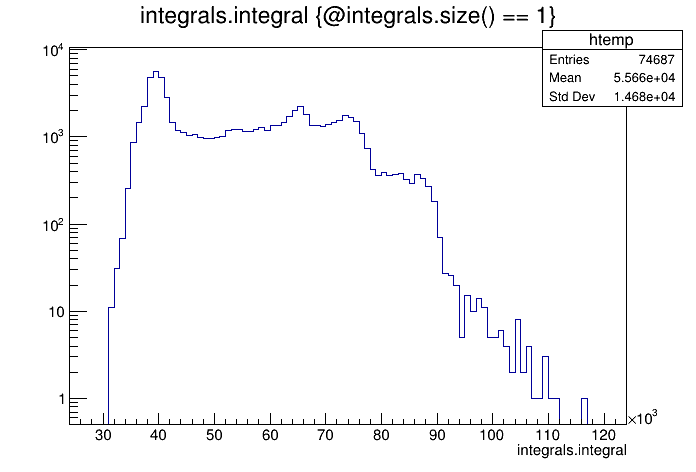

In [168]:
c = r.TCanvas()
# t.Draw("integrals.integral")
t.Draw("integrals.integral","@integrals.size() == 1","")
c.SetLogy()
c.Draw()

In [169]:
# cut = "amcNum == 1 && @integrals.size() == 1 && integrals.amcNum == 1"
cut = "integrals.amcNum == 1"

hr = r.TH2D("h", "; Pulse Integral [arb. u.]; Channel Number", 1000,0,200000,5,0,5)
hr2 = r.TH3D("h2", "; Pulse Integral [arb. u.]; Amplitude [ADC Counts/4.096 -> mV]; Channel Number", 1000,0,200000, 1000,0,1000,5,0,5)
t.Draw("integrals.channelTag:integrals.integral>>h", cut,"goff")
t.Draw("integrals.channelTag:integrals.amplitude/4.096:integrals.integral>>h2", cut,"goff")
h = uproot.from_pyroot(hr).to_hist()
h2 = uproot.from_pyroot(hr2).to_hist()
h

Hist(
  Regular(1000, 0, 200000, name=<TString 'xaxis' at 0x7f9a24d52950>, label=<TString ' Pulse Integral [arb. u.]' at 0x7f9a24d529d0>),
  Regular(5, 0, 5, name=<TString 'yaxis' at 0x7f9a24d52650>, label=<TString ' Channel Number' at 0x7f9a24d52a50>),
  storage=Double()) # Sum: 500451.0 (500613.0 with flow)

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [170]:
h2

Hist(
  Regular(1000, 0, 200000, name=<TString 'xaxis' at 0x7f9a24d536d0>, label=<TString ' Pulse Integral [arb. u.]' at 0x7f9a24d53750>),
  Regular(1000, 0, 1000, name=<TString 'yaxis' at 0x7f9a24d53850>, label=<TString ' Amplitude [ADC Counts/4.096 -> mV]' at 0x7f9a24d538d0>),
  Regular(5, 0, 5, name=<TString 'zaxis' at 0x7f9a24d539d0>, label=<TString ' Channel Number' at 0x7f9a24d53a50>),
  storage=Double()) # Sum: 500451.0 (500613.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f99e7c38ed0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

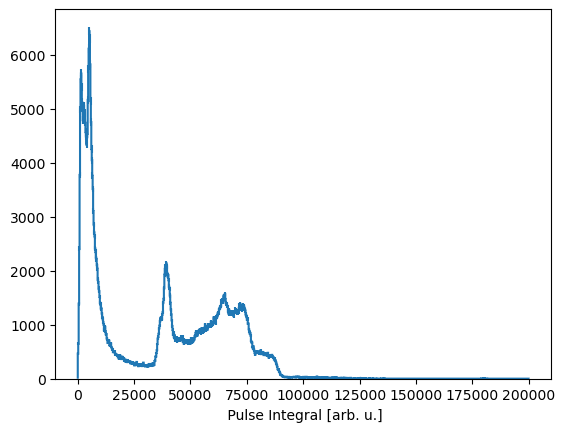

In [171]:
h2.project(0).plot()

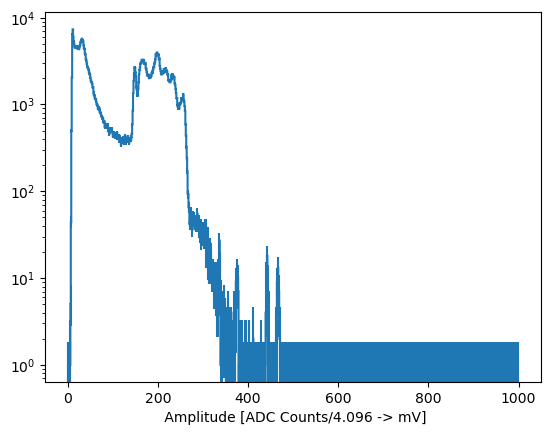

In [172]:
h2.project(1).plot()
plt.yscale("log")

In [173]:
import matplotlib

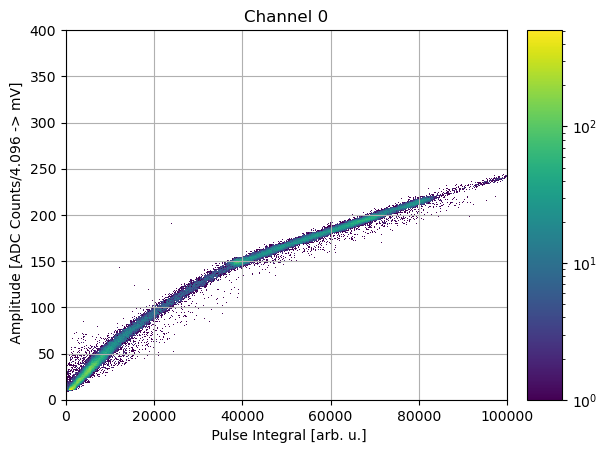

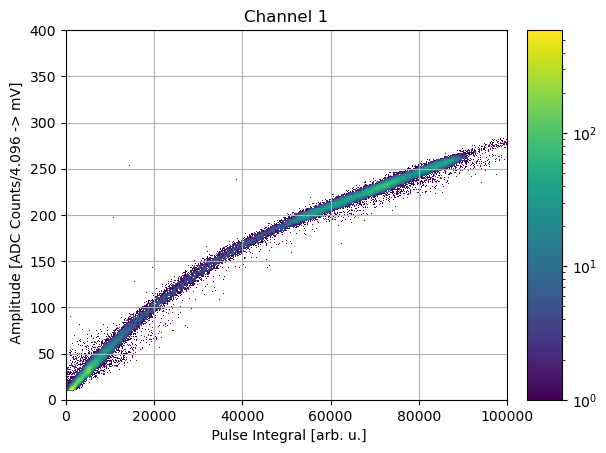

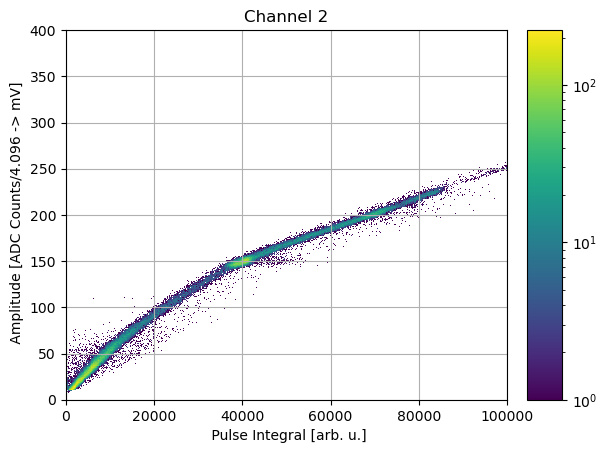

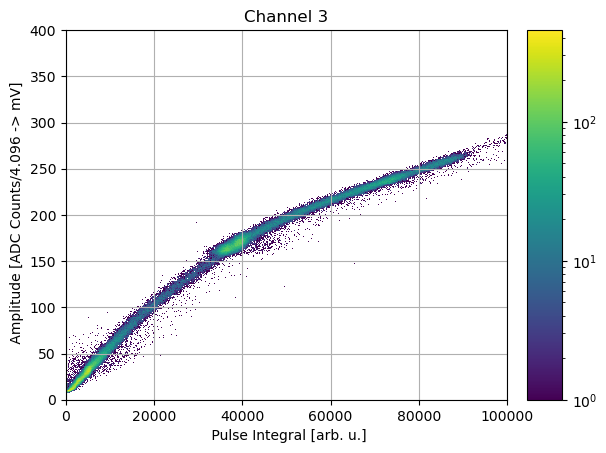

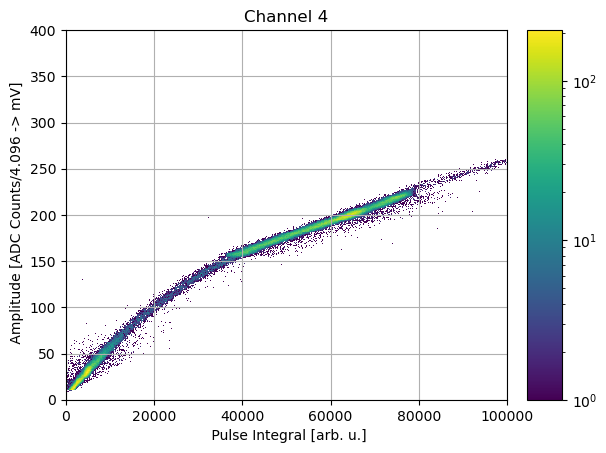

In [174]:
for channel in range(5):
    hi = h2[:100000j,:400j,hist.loc(channel)]
    hi.plot(
        norm=matplotlib.colors.LogNorm(vmin=1)
    )
    plt.grid()
    plt.title(f"Channel {channel}")
    plt.show()

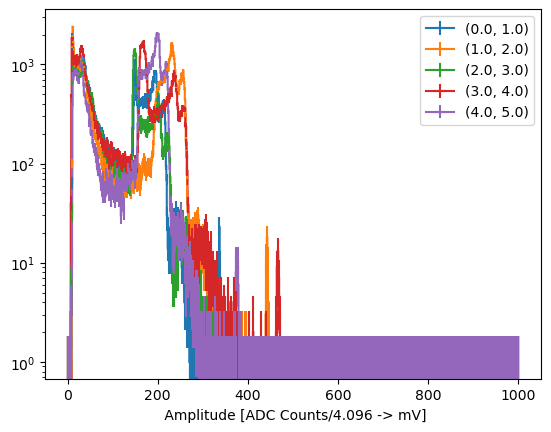

In [175]:
h2[::sum,:,:].stack(1).plot()
plt.legend()
plt.yscale("log")
plt.show()

In [176]:
import matplotlib

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f9a23b59d10>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f9a23cf3fd0>, text=[])

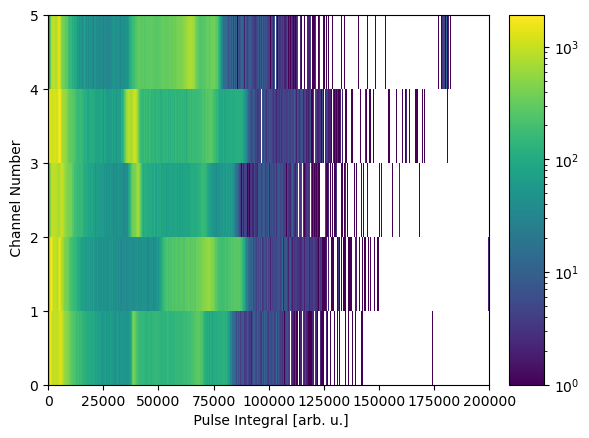

In [177]:
h.plot(
    norm = matplotlib.colors.LogNorm(vmin=1)
)

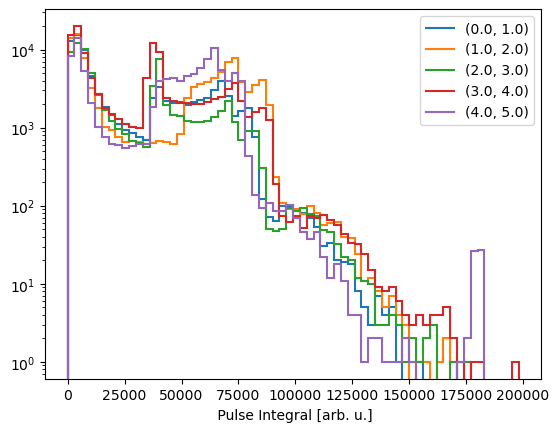

In [178]:
h[::hist.rebin(15),:].stack(1).plot(yerr=False)
plt.yscale("log")
plt.legend()
plt.show()

---

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


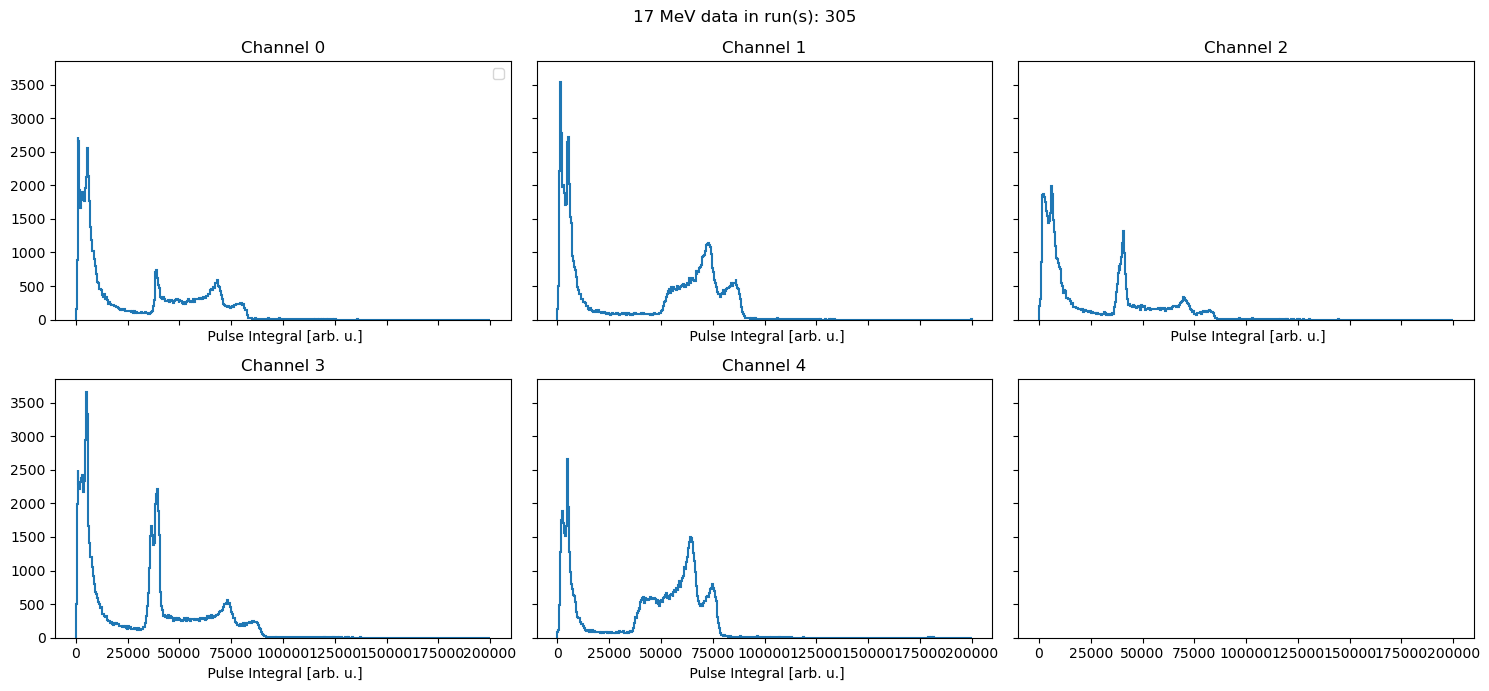

In [191]:
fig,ax = plt.subplots(2,3,figsize=(15,7),sharex=True,sharey=True)
for channel in range(5):
    axi = ax.ravel()[channel]
    hi = h[::hist.rebin(2),hist.loc(channel)]
    # f_ref[f'h2_{channel}'].to_hist().plot(ax=axi,label='Run 249')
    # f_ref[f'h_{channel}'].to_hist().plot(ax=axi,label='Run 252')
    hi.plot(ax=axi, yerr=False)
    axi.set_title(f'Channel {channel}')
    # axi.legend()
plt.tight_layout()
# plt.xlim(20000,80000)
ax[0][0].legend()
plt.suptitle(f'17 MeV data in run(s): {run}')
plt.tight_layout()
plt.show()

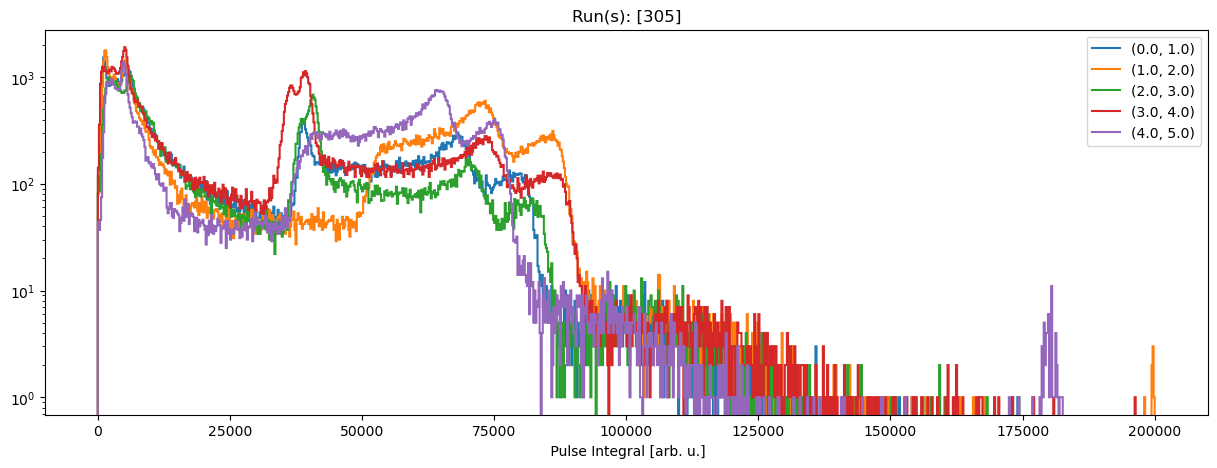

In [199]:
fig,ax = plt.subplots(figsize=(15,5))
h.stack(1).plot(yerr=False)
plt.legend()
plt.title(f'Run(s): {runs}')
plt.yscale("log")
plt.show()

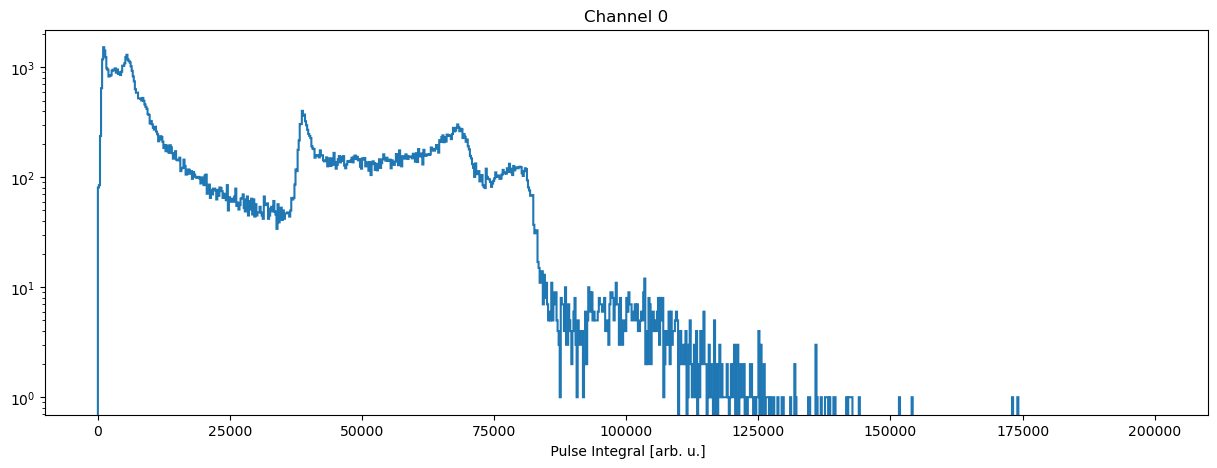

In [200]:
channel = 0

fig,ax = plt.subplots(figsize=(15,5))
hi = h[:,hist.loc(channel)]
hi.plot(yerr=False)
plt.title(f'Channel {channel}')
plt.yscale("log")
plt.show()

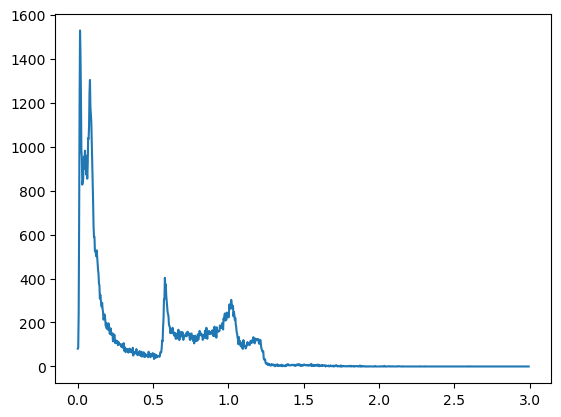

In [202]:
hii = hi[50000j:]
avg = np.average(hii.axes[0].centers, weights=hii.values())
scale_factor = 1.0/avg

xs = hi.axes[0].centers
ys = hi.values()
plt.plot(xs*scale_factor, ys)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calibration factor: 1.4684e-05
Calibration factor: 1.3643e-05
Calibration factor: 1.4347e-05
Calibration factor: 1.3643e-05
Calibration factor: 1.5601e-05


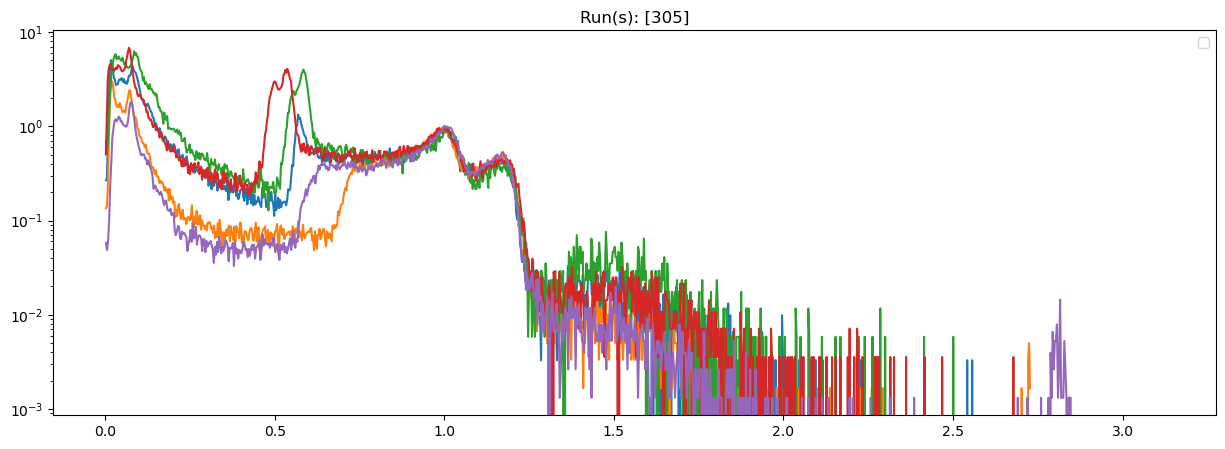

In [211]:
fig,ax = plt.subplots(figsize=(15,5))
for channel in range(5):
    hi = h[:,hist.loc(channel)]
    hii = hi[50000j:]
    # avg = np.average(hii.axes[0].centers, weights=hii.values())
    avg = hii.axes[0].centers[list(hii.values()).index(np.amax(hii.values()))]
    scale_factor = 1.0/avg
    yscale = np.amax(hii.values())

    xs = hi.axes[0].centers
    ys = hi.values()
    plt.plot(xs*scale_factor, ys/yscale)
    print(f'Calibration factor: {scale_factor:.4e}')
plt.legend()
plt.title(f'Run(s): {runs}')
plt.yscale("log")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


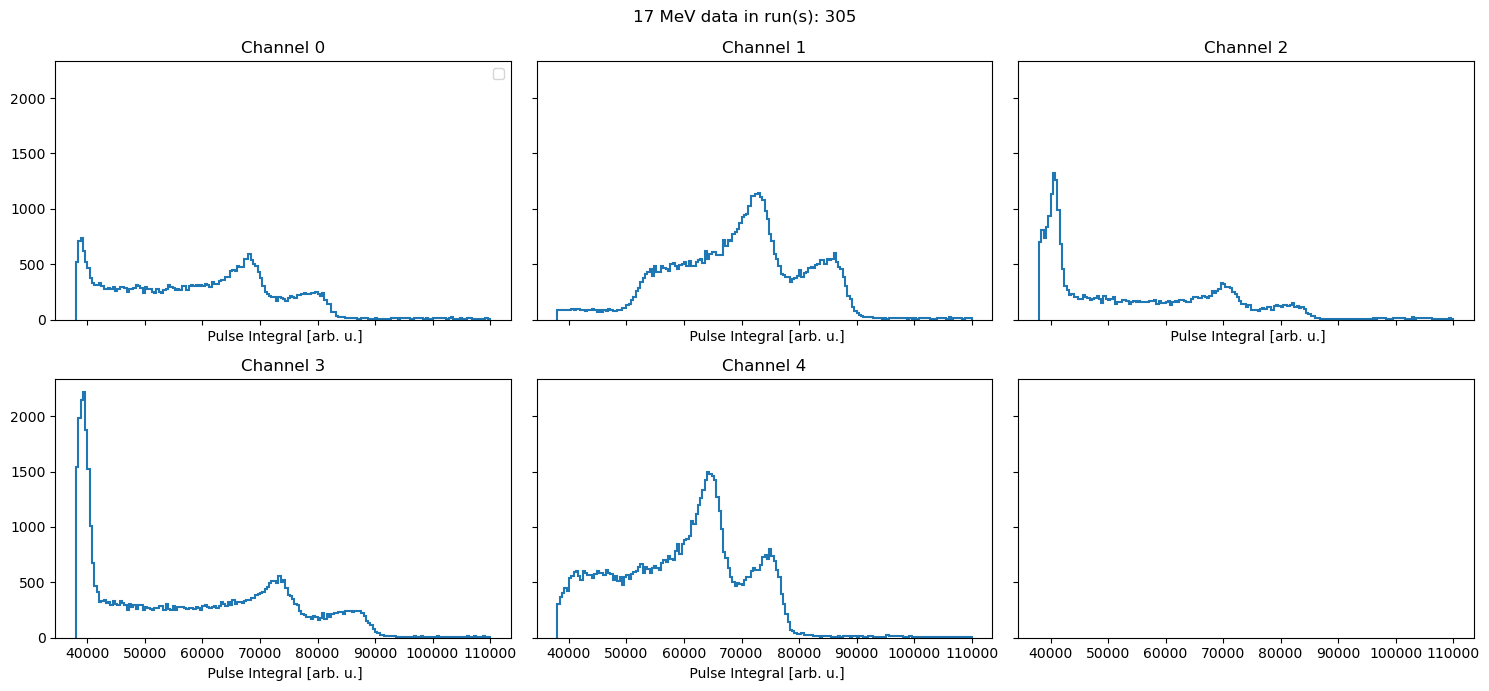

In [179]:
fig,ax = plt.subplots(2,3,figsize=(15,7),sharex=True,sharey=True)
for channel in range(5):
    axi = ax.ravel()[channel]
    hi = h[38000j:110000j:hist.rebin(2),hist.loc(channel)]
    # f_ref[f'h2_{channel}'].to_hist().plot(ax=axi,label='Run 249')
    # f_ref[f'h_{channel}'].to_hist().plot(ax=axi,label='Run 252')
    hi.plot(ax=axi, yerr=False)
    axi.set_title(f'Channel {channel}')
    # axi.legend()
plt.tight_layout()
# plt.xlim(20000,80000)
ax[0][0].legend()
plt.suptitle(f'17 MeV data in run(s): {run}')
plt.tight_layout()
plt.show()

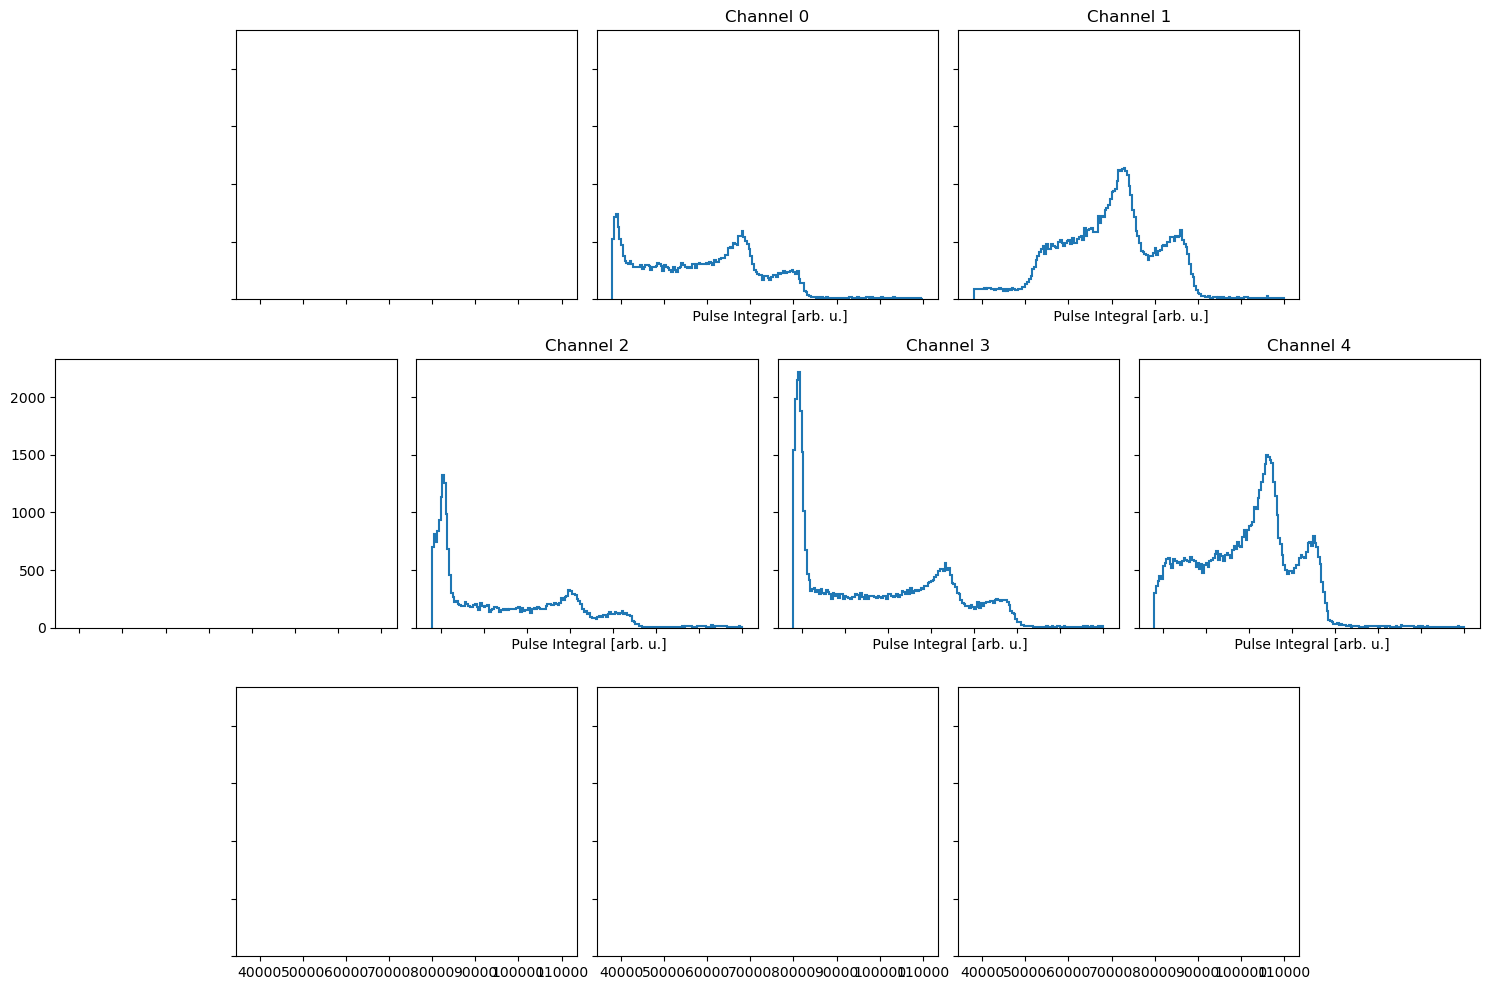

In [180]:
# channel_map = {
#     0:'C',
#     1:'B',
#     2:'G',
#     3:'F',
#     4:'E',
# }

channel_map = {
    0:'B',
    1:'C',
    2:'E',
    3:'F',
    4:'G',
}


layout_string = '.AABBCC.\nDDEEFFGG\n.HHIIJJ.'

fig,ax = plt.subplot_mosaic(layout_string,figsize=(15,10), sharex=True, sharey=True)
for channel in range(5):
    axi = ax[channel_map[channel]]
    hi = h[38000j:110000j:hist.rebin(2),hist.loc(channel)]
    # hi = h[:70000j:hist.rebin(3),hist.loc(channel)]
    hi.plot(ax=axi, yerr=False)
    axi.set_title(f'Channel {channel}')
    # axi.get_legend().remove()
plt.tight_layout()
plt.show()


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9a23da4950>, errorbar=None, legend_artist=None)]

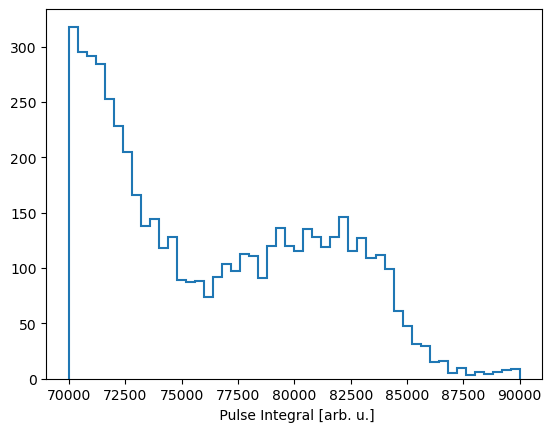

In [181]:
h[70000j:90000j:hist.rebin(2),2j].plot(yerr=False)

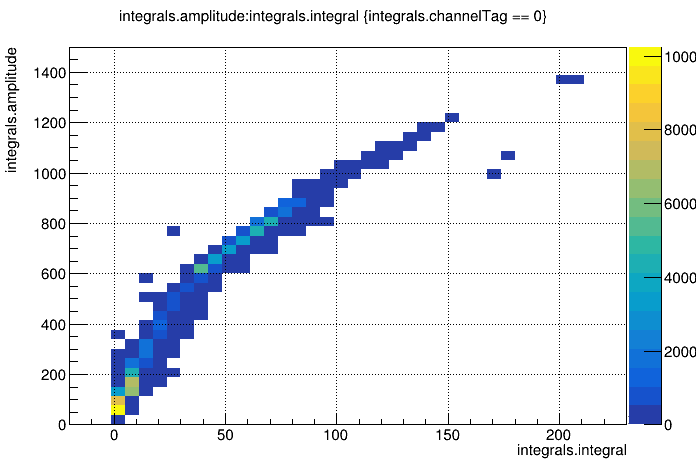

In [182]:
c = r.TCanvas()
t.Draw("integrals.amplitude:integrals.integral","integrals.channelTag == 0","colz")
c.SetGrid()
c.Draw()

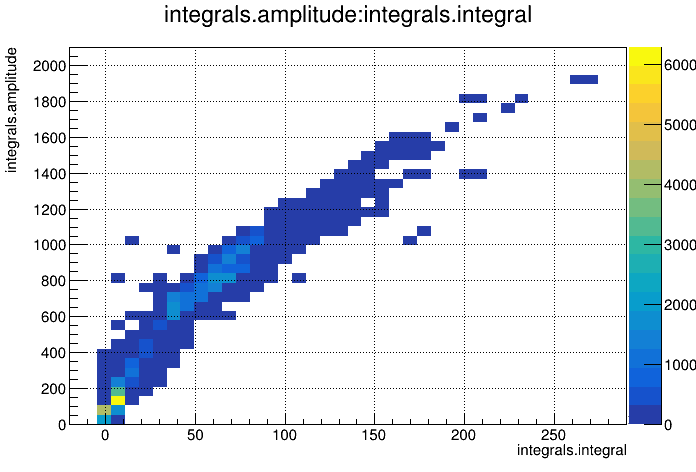

In [183]:
c = r.TCanvas()
t.Draw("integrals.amplitude:integrals.integral","","colz")
c.SetGrid()
c.Draw()

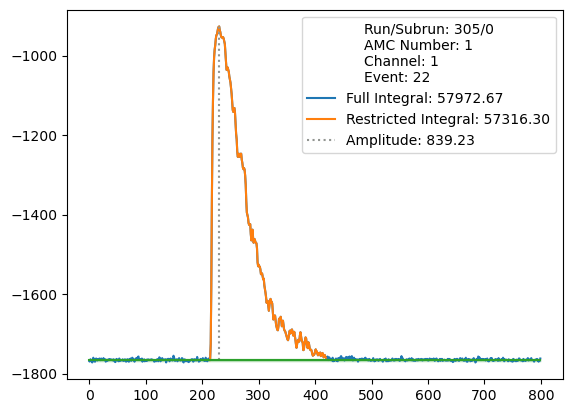

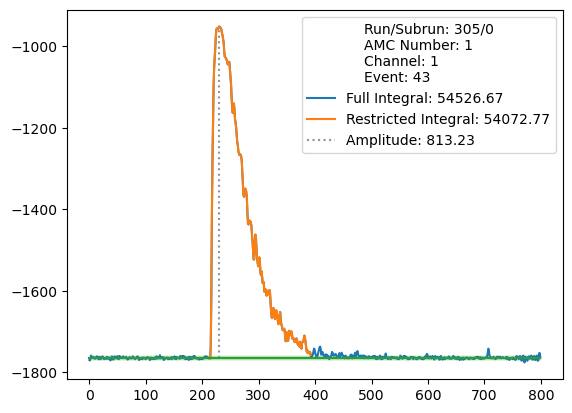

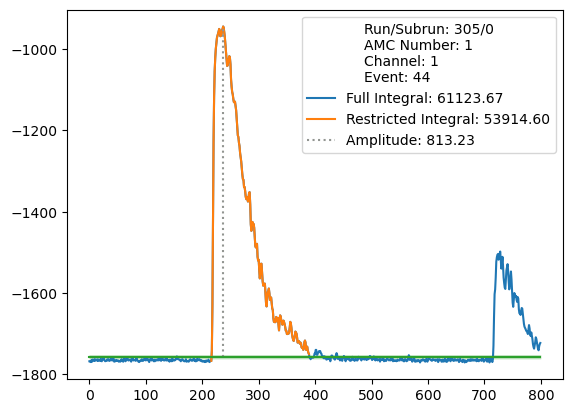

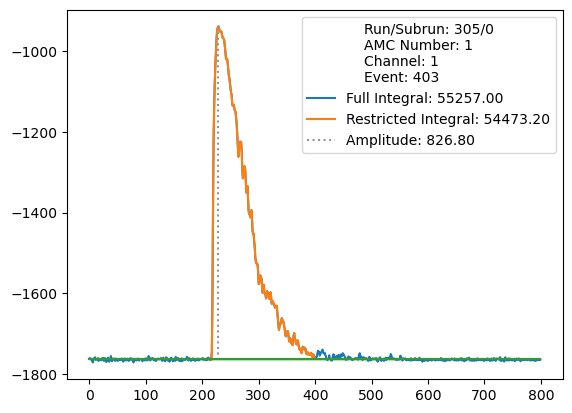

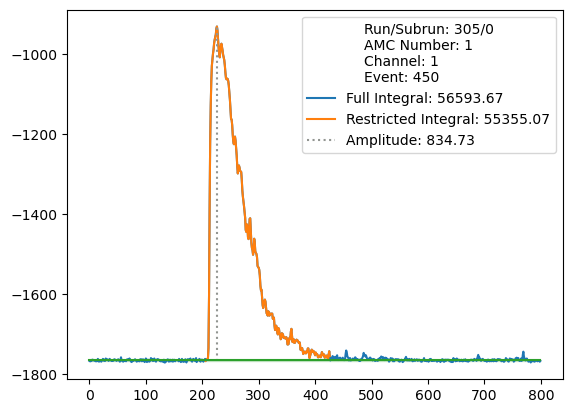

In [184]:
counter = 0
limit = 4
# e1,e2 = 400,450
e1,e2 = 800,850
for i,e in enumerate(t):
    if(len(e.integrals) > 1):
        continue
    for wf in e.integrals:
        if wf.channelTag == 1 and wf.amplitude > e1 and wf.amplitude < e2:
            plot_integral(wf)
            plt.show()
            counter += 1
            if counter > limit:
                break
    if counter > limit:
        break 


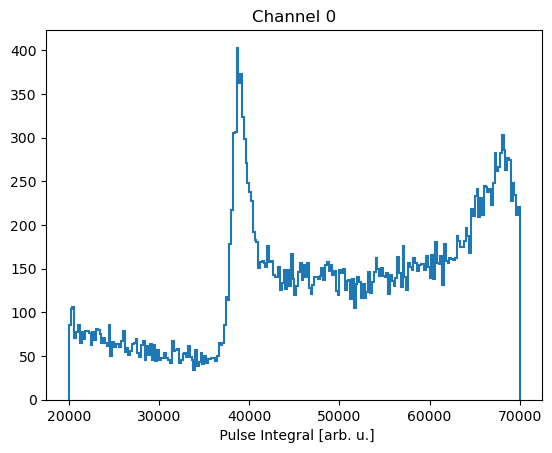

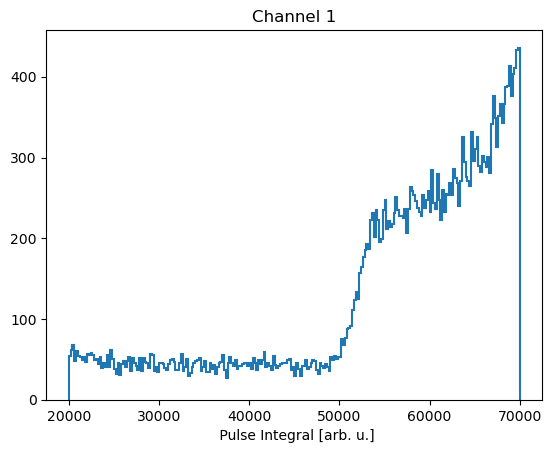

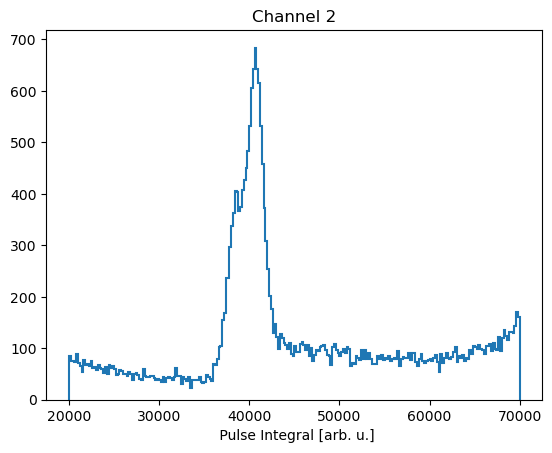

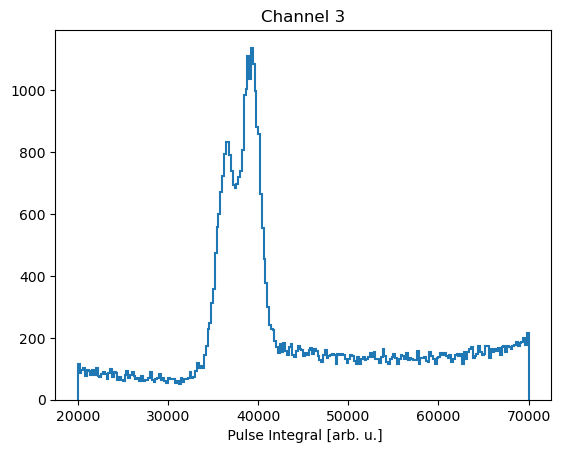

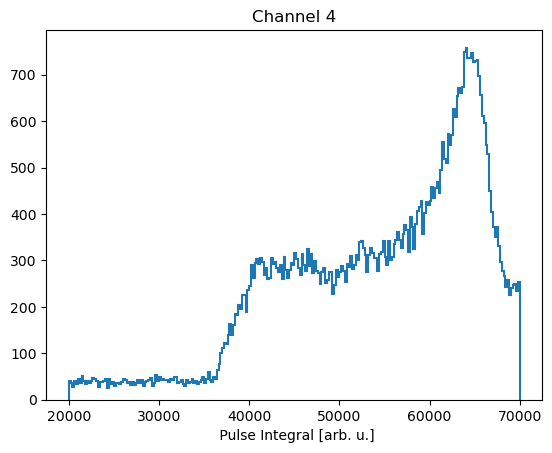

In [185]:
for channel in range(5):
    h[20000j:70000j,hist.loc(channel)].plot(yerr=False)
    plt.title(f'Channel {channel}')
    plt.show()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f99f91f5190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

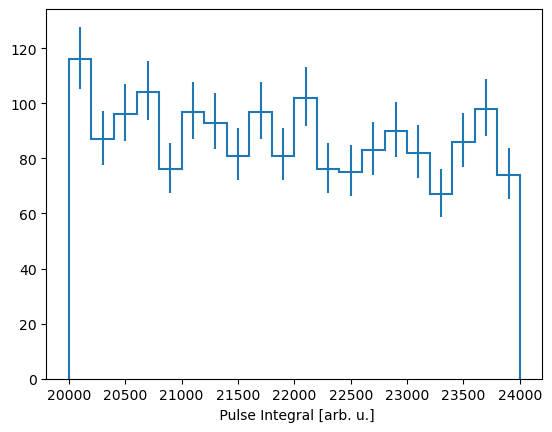

In [186]:
h[20000j:24000j,3j].plot()

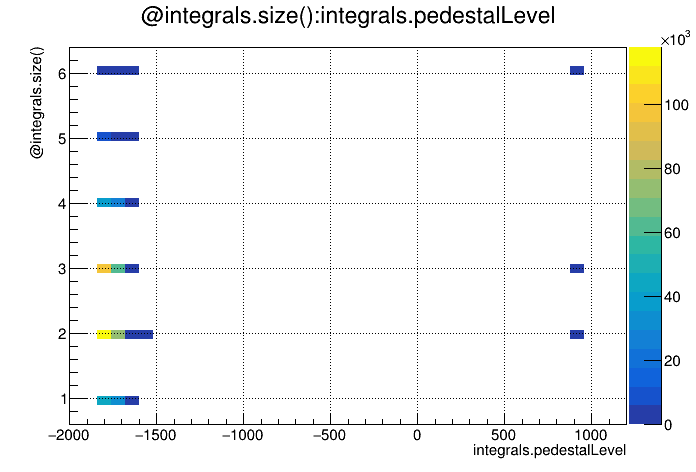

In [187]:
t.Draw("@integrals.size():integrals.pedestalLevel","", "colz")
c.Draw()

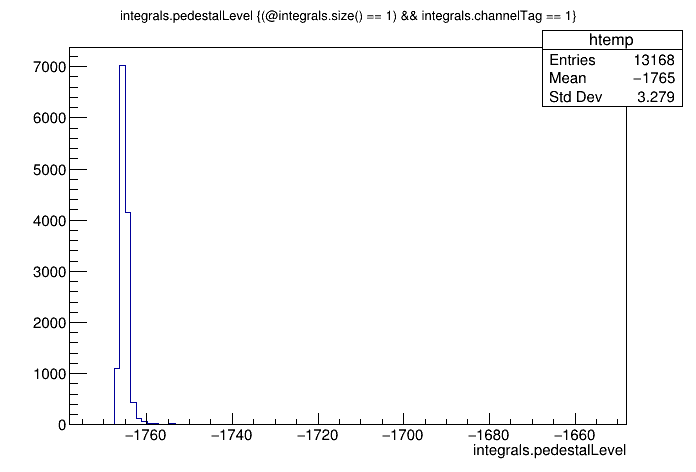

In [188]:
c = r.TCanvas()
t.Draw("integrals.pedestalLevel", "(@integrals.size() == 1) && integrals.channelTag == 1","colz")
# c.SetLogy()
c.Draw()

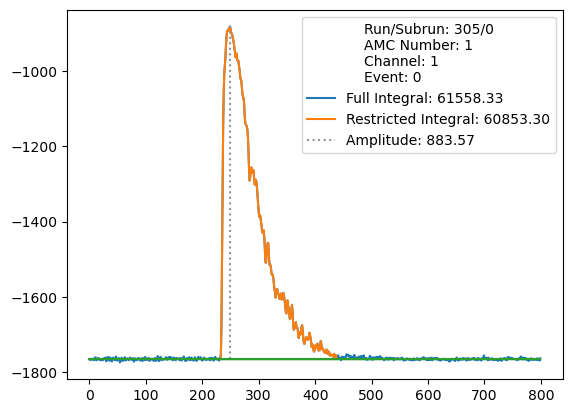

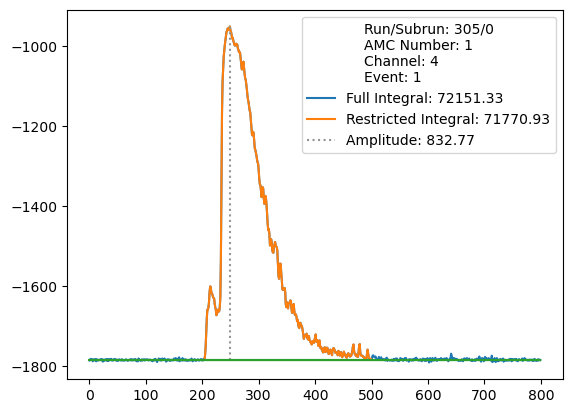

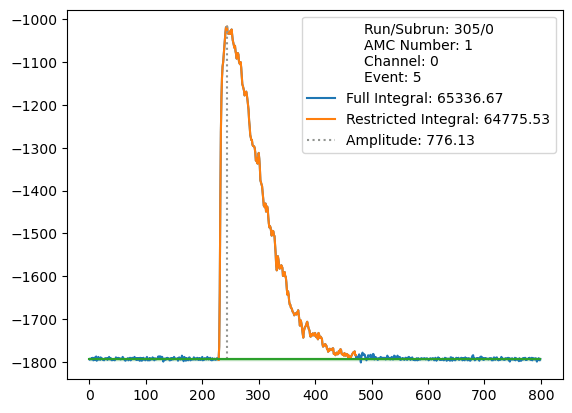

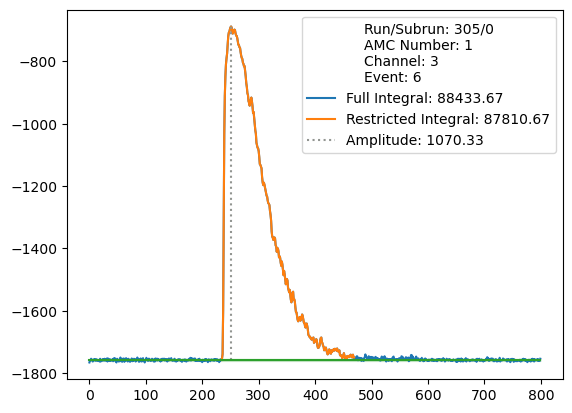

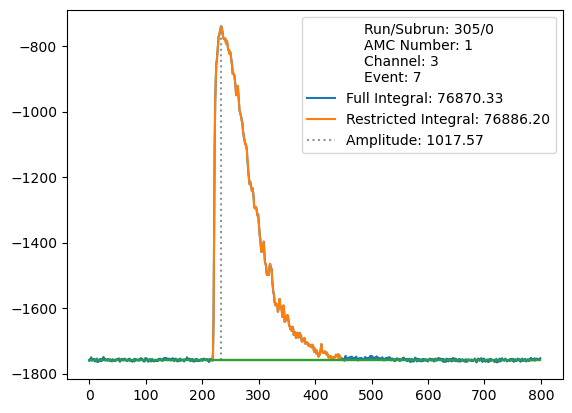

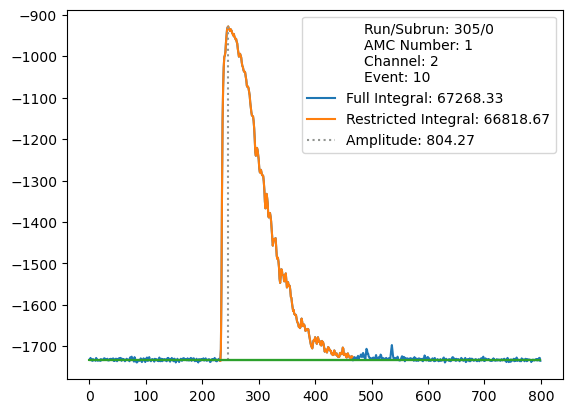

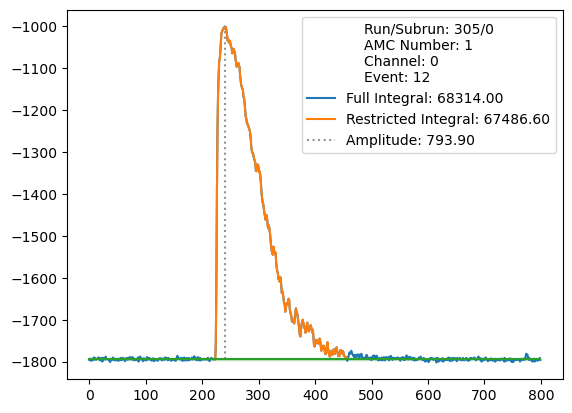

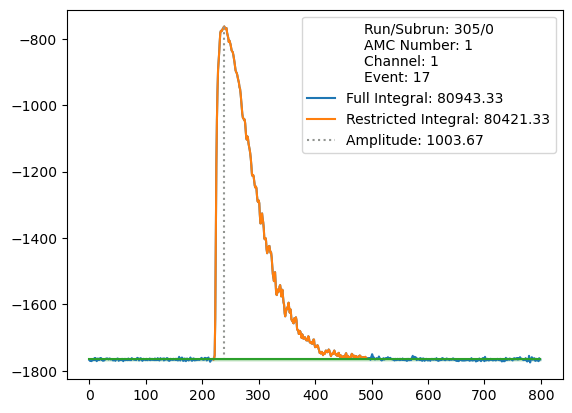

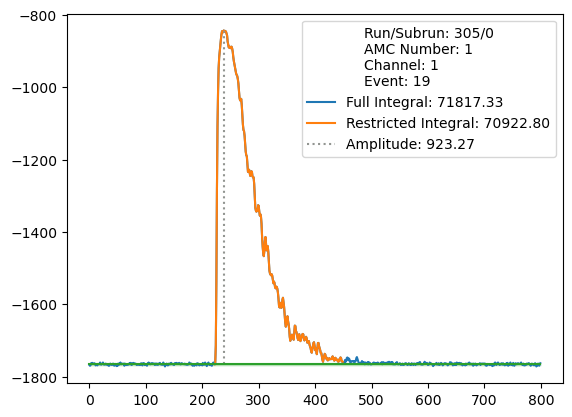

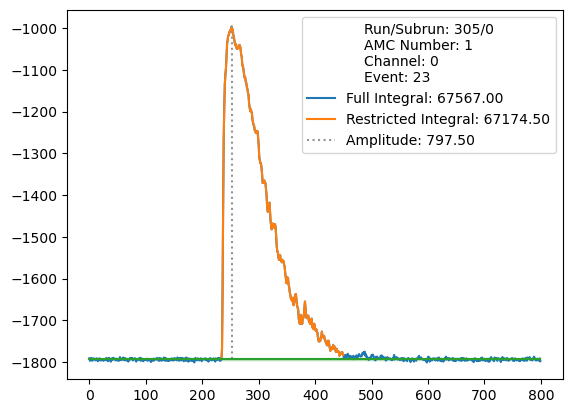

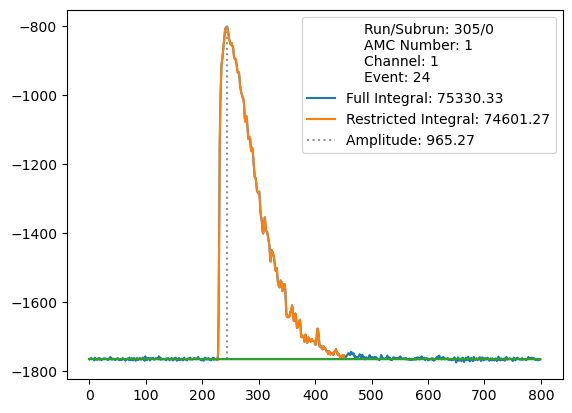

In [189]:
counter = 0
limit = 10
for i, e in enumerate(t):
    for wf in e.integrals:
        if wf.integral > 60500:
            plot_integral(wf)
            plt.show()
            counter += 1
        if(counter > limit):
            break 

    if(counter > limit):
        break 

        

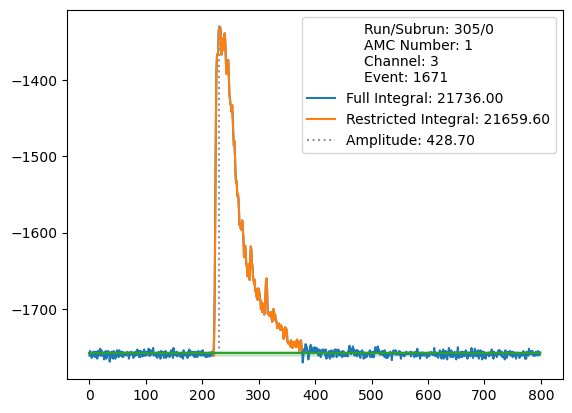

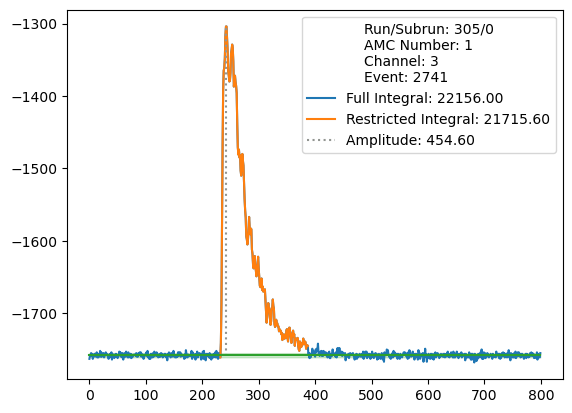

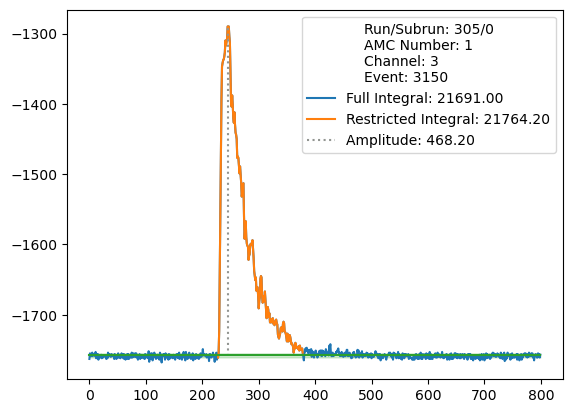

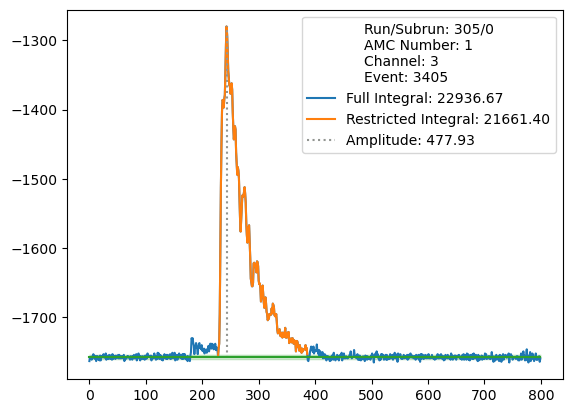

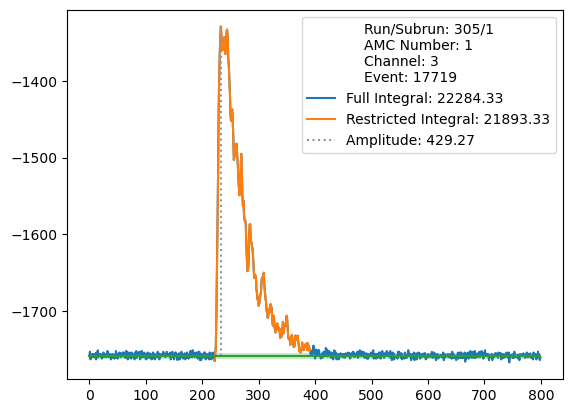

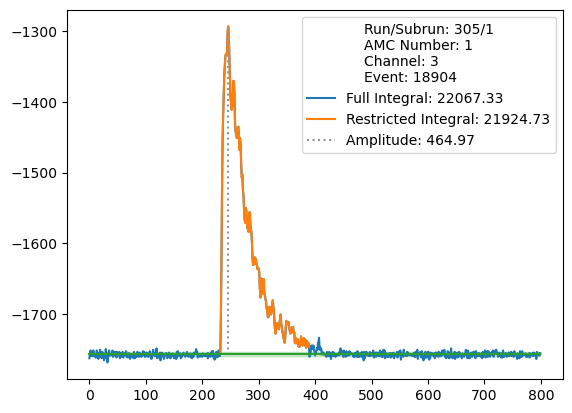

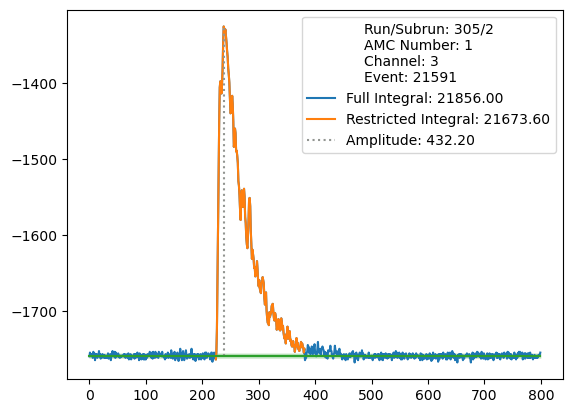

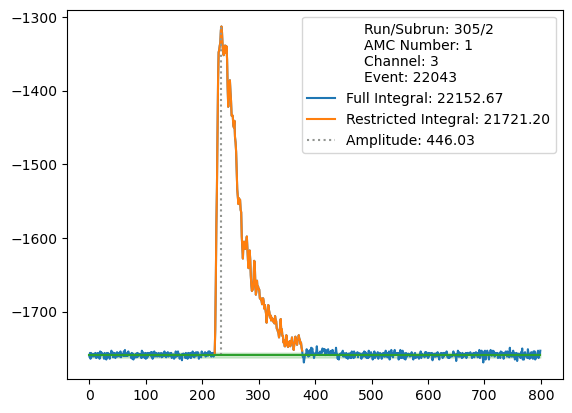

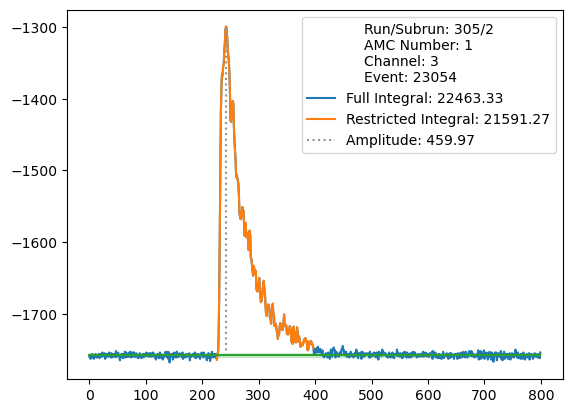

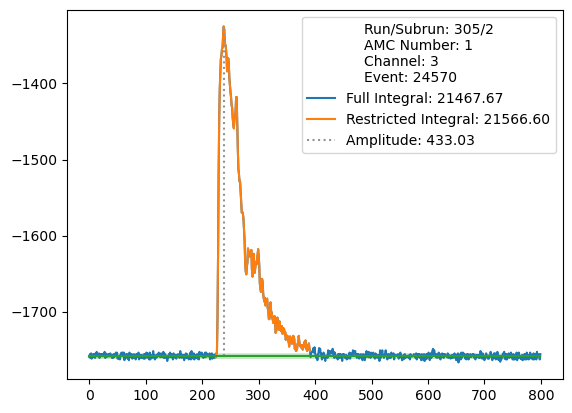

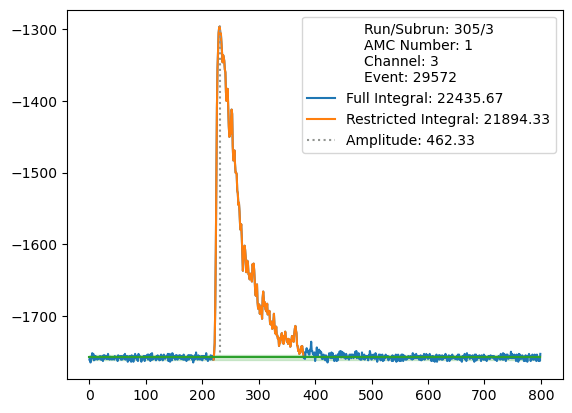

In [190]:
counter = 0
limit = 10
for i, e in enumerate(t):
    for wf in e.integrals:
        if wf.channelTag == 3 and wf.integral > 21500 and wf.integral < 22000:
            plot_integral(wf)
            plt.show()
            counter += 1
        if(counter > limit):
            break 

    if(counter > limit):
        break 

        